<a href="https://colab.research.google.com/github/Virijavidapu/AspyrLabs-Grp3/blob/main/Graded_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ASSIGNMENT

In [ ]:
# I have created markdown cells and listed tools,libraries and languages used in data science and some exdcutable codes mentioned in my assignment

In [ ]:
#List Of Data Science Languages
Python
R
Julia
Java Script

In [ ]:
#List Of Data Science Libraries
Numpy
Pandas
Scikitlearn
matplotlib

  SI NO        Tools
0     1       Pandas
1     2      Jupyter
2     3        Numpy
3     4  Scikitlearn
4     5          Git


27.0

Enter the number:3
Enter the number:5
8
15


enter number of minutes:120
2


In [2]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
file_path = '/content/Assignment-3-ML-Sales_Transactions_Dataset_Weekly.csv'
sales_data = pd.read_csv(file_path)
weeks_columns = [f'W{i}' for i in range(52)]
sales_long = sales_data.melt(id_vars=['Product_Code'], value_vars=weeks_columns,
                             var_name='Week', value_name='Sales')

In [4]:
sales_long['Week_Num'] = sales_long['Week'].str.extract('(\d+)').astype(int)
sales_long = sales_long.sort_values(['Product_Code', 'Week_Num'])
product_sales = sales_long[sales_long['Product_Code'] == 'P1'].set_index('Week_Num')['Sales']
train_size = int(len(product_sales) * 0.8)
train_data, test_data = product_sales[:train_size], product_sales[train_size:]
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()
predictions = model_fit.forecast(steps=len(test_data))


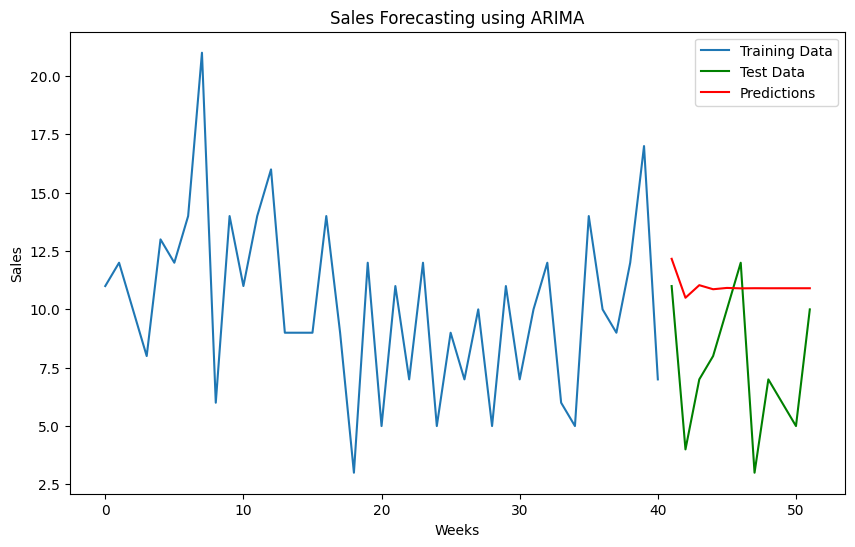

Sales Forecast for the next 2 years (in weeks):
41     12.167359
42     10.498623
43     11.037521
44     10.863491
45     10.919692
         ...    
140    10.905973
141    10.905973
142    10.905973
143    10.905973
144    10.905973
Name: predicted_mean, Length: 104, dtype: float64


In [5]:

plt.figure(figsize=(10,6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data', color='green')
plt.plot(test_data.index, predictions, label='Predictions', color='red')
plt.legend()
plt.title('Sales Forecasting using ARIMA')
plt.xlabel('Weeks')
plt.ylabel('Sales')
plt.show()
future_forecast = model_fit.forecast(steps=104)  # 2 years (52 weeks x 2)
print("Sales Forecast for the next 2 years (in weeks):")
print(future_forecast)